In [34]:
positions = pd.read_csv(FILE)
diff = positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']].diff()
relative_to_first_frame = positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']] - positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']].iloc[0]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
targets = pd.read_csv('/home/fedeizzo/uni/camera-estimation/data/targets.csv')
predictions = pd.read_csv('/home/fedeizzo/uni/camera-estimation/data/predictions.csv')
targets.rename(columns={
    'tx':'x',
    'ty':'y',
    'tz':'z',
},inplace=True)
predictions.rename(columns={
    'tx':'x',
    'ty':'y',
    'tz':'z',
},inplace=True)

In [19]:
real = targets[['x', 'y', 'z']]
predicted = predictions[['x', 'y', 'z']]
LINE=False
PREDICTED=True
REAL = True
LIM=True
S=10
A=0.5
X_L=-3
X_H=3
Y_L=-3
Y_H=3

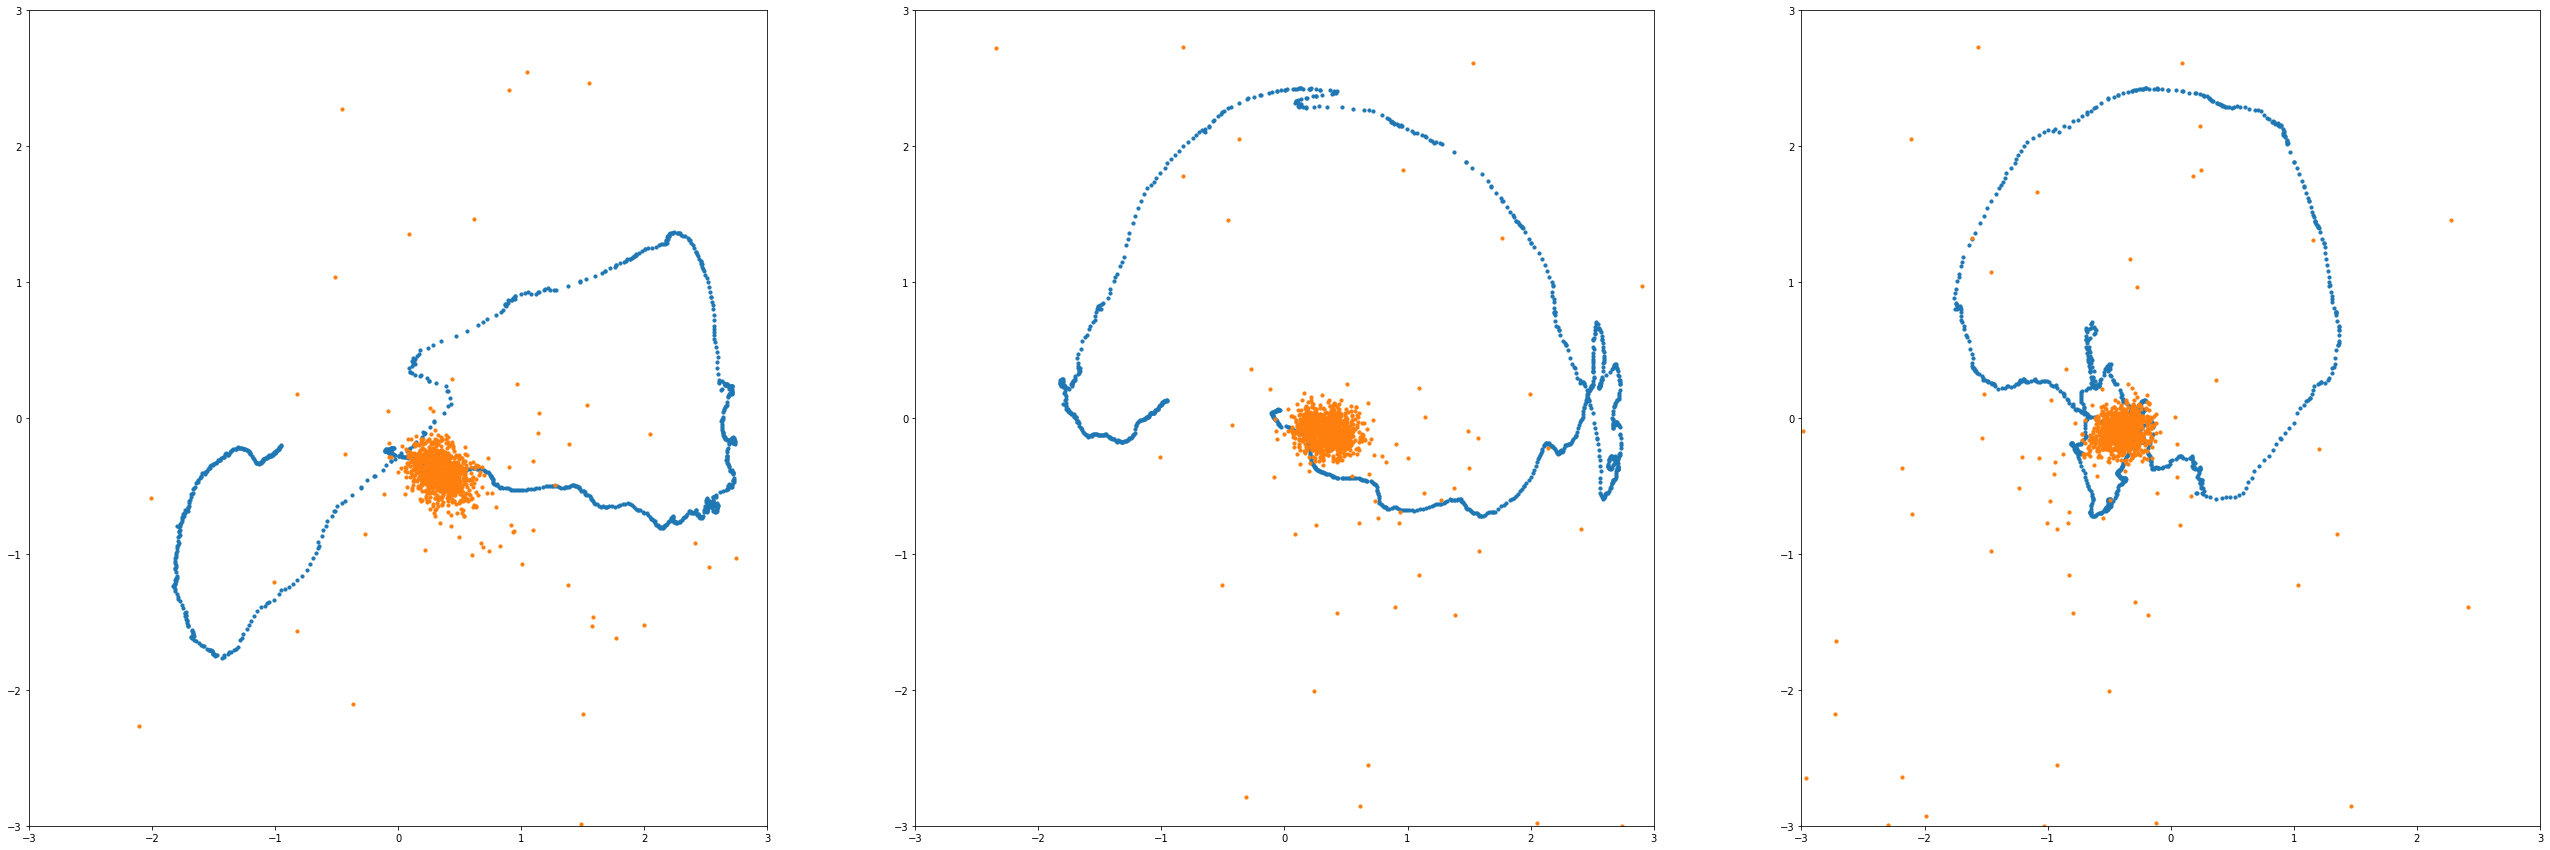

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(45, 15))
if REAL:
    ax[0].scatter(real['x'], real['y'],s=S)
    ax[1].scatter(real['x'], real['z'],s=S)
    ax[2].scatter(real['y'], real['z'],s=S)
if PREDICTED:
    ax[0].scatter(predicted['x'], predicted['y'],s=S)
    ax[1].scatter(predicted['x'], predicted['z'],s=S)
    ax[2].scatter(predicted['y'], predicted['z'],s=S)
if LINE:
    for p1r, p2r, p1p, p2p in zip(real['x'], real['y'], predicted['x'], predicted['y']):
        ax[0].plot([p1r, p1p], [p2r,p2p], 'r-',alpha=A)
    for p1r, p2r, p1p, p2p in zip(real['x'], real['z'], predicted['x'], predicted['z']):
        ax[1].plot([p1r, p1p], [p2r,p2p], 'r-',alpha=A)
    for p1r, p2r, p1p, p2p in zip(real['y'], real['z'], predicted['y'], predicted['z']):
        ax[2].plot([p1r, p1p], [p2r,p2p], 'r-',alpha=A)
if LIM:
    for i in range(3):
        ax[i].set_ylim([Y_L,Y_H])
        ax[i].set_xlim([X_L,X_H])
plt.show()

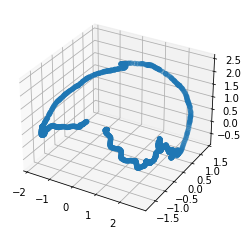

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(real['x'], real['y'], real['z'])

In [235]:
a = abs((targets.x - predictions.x)).mean()**2+abs((targets.y - predictions.y)).mean()**2+abs((targets.y - predictions.y)).mean()**2

In [236]:
np.sqrt(a)

1.9723778512327295

In [219]:
predictions

,x,y,z,qx,qy,qz,qw
0,-0.428762,-0.300332,0.815216,0.093696,0.639666,0.669329,0.739311
1,2.384666,-0.709468,-0.251945,0.089266,-0.288721,-0.164794,1.255972
2,-0.580596,-0.341643,1.178271,-0.117034,0.245919,0.280084,0.323743
3,-2.035839,-1.168633,0.488008,-0.053327,-0.350907,-0.113118,0.150234
4,0.478444,-0.444157,-0.355157,-0.231748,0.133727,0.180015,1.082630
...,...,...,...,...,...,...,...
995,2.718118,0.258291,-0.096053,-0.053572,-0.519395,-0.331234,1.037922
996,3.650186,5.922872,2.329030,1.053885,1.913391,-0.700083,1.427947
997,-1.250855,-1.962354,0.632060,-0.043154,0.168656,0.027243,0.785176
998,0.583760,-1.084450,2.344211,-0.292184,0.186846,0.512558,0.815332
